In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [2]:
df = pd.read_csv('wine.data.csv')
df.head(10)

Label  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   
5      1    14.20        1.76  2.45               15.2        112   
6      1    14.39        1.87  2.45               14.6         96   
7      1    14.06        2.15  2.61               17.6        121   
8      1    14.83        1.64  2.17               14.0         97   
9      1    13.86        1.35  2.27               16.0         98   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   
5           3.27        3.39                  0.34             1.97   
6           2.50        2.52                  0.30             1.98   
7           2.60        2.51                  0.31             1.25   
8           2.80        2.98                  0.29             1.98   
9           2.98        3.15                  0.22             1.85   

   Color intensity   Hue  OD280  Proline  
0             5.64  1.04   3.92     1065  
1             4.38  1.05   3.40     1050  
2             5.68  1.03   3.17     1185  
3             7.80  0.86   3.45     1480  
4             4.32  1.04   2.93      735  
5             6.75  1.05   2.85     1450  
6             5.25  1.02   3.58     1290  
7             5.05  1.06   3.58     1295  
8             5.20  1.08   2.85     1045  
9             7.22  1.01   3.55     1045

In [3]:
# Make label column a new dataframe
df2 = pd.DataFrame(df['Label'])
df2.head(10)


Label
0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1

In [4]:
# Drop label from original dataframe
df3 = df.drop(['Label'], axis = 1)
df3.head(10)

Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
0    14.23        1.71  2.43               15.6        127           2.80   
1    13.20        1.78  2.14               11.2        100           2.65   
2    13.16        2.36  2.67               18.6        101           2.80   
3    14.37        1.95  2.50               16.8        113           3.85   
4    13.24        2.59  2.87               21.0        118           2.80   
5    14.20        1.76  2.45               15.2        112           3.27   
6    14.39        1.87  2.45               14.6         96           2.50   
7    14.06        2.15  2.61               17.6        121           2.60   
8    14.83        1.64  2.17               14.0         97           2.80   
9    13.86        1.35  2.27               16.0         98           2.98   

   Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   
5        3.39                  0.34             1.97             6.75  1.05   
6        2.52                  0.30             1.98             5.25  1.02   
7        2.51                  0.31             1.25             5.05  1.06   
8        2.98                  0.29             1.98             5.20  1.08   
9        3.15                  0.22             1.85             7.22  1.01   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45     1480  
4   2.93      735  
5   2.85     1450  
6   3.58     1290  
7   3.58     1295  
8   2.85     1045  
9   3.55     1045

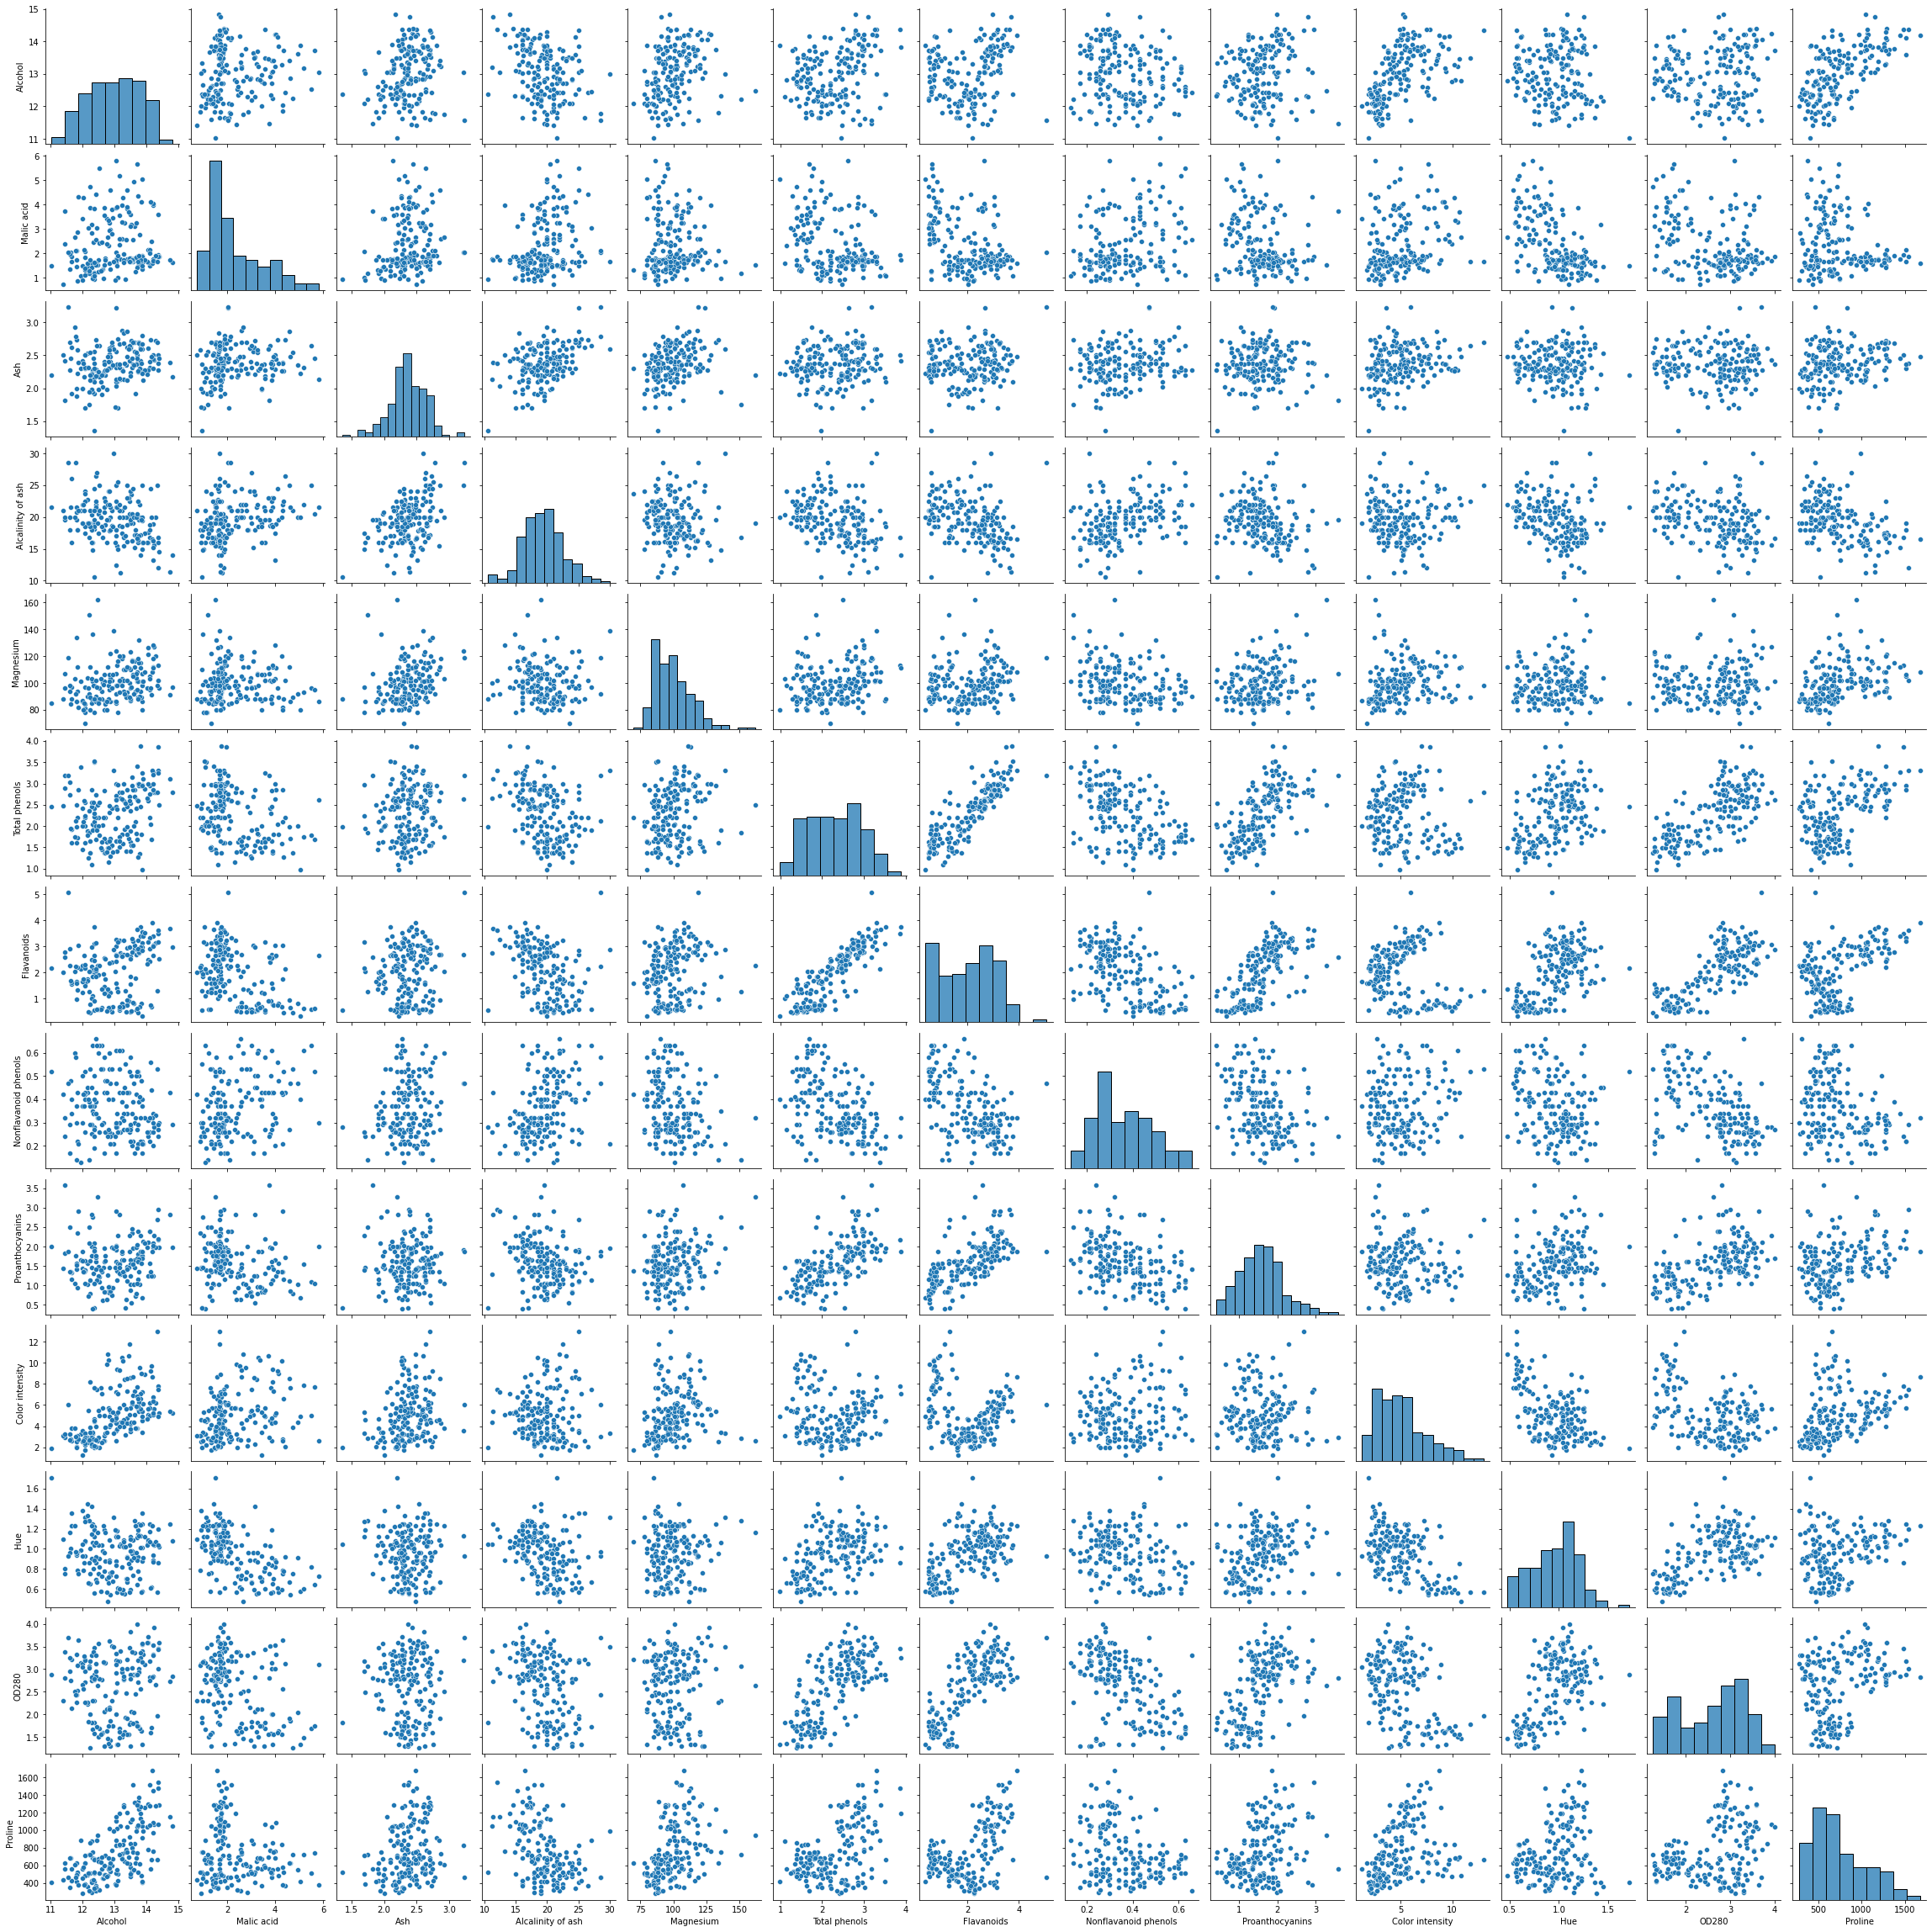

In [5]:
# Pair plost shows all attributes in scatter plots and histograms
pair_plot = sns.pairplot(df3)


In [6]:
# Conclusion of pairplot:
# The wine data seems to have a large amount of variation within the different attributes. The flaviniods and total phenols provided the strongest correlation.


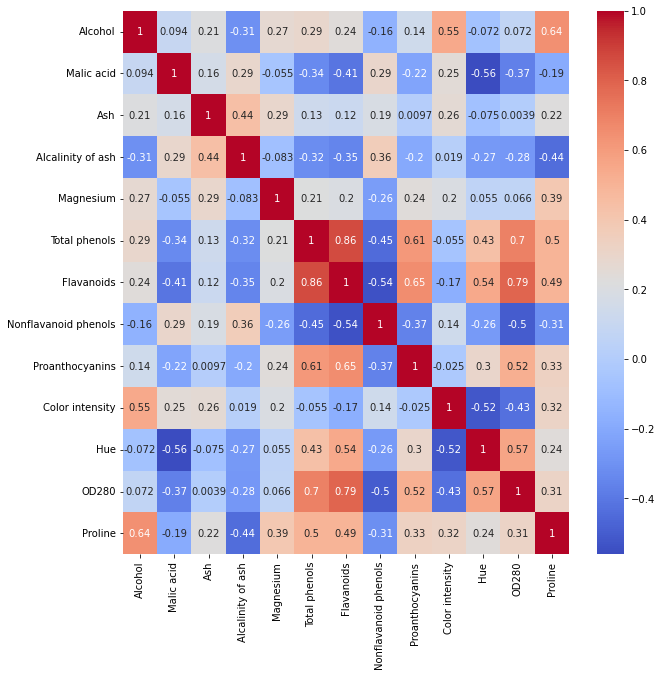

In [7]:
# Plot heat map
plt.figure(figsize=(10,10))
h_map = sns.heatmap(df3.corr(), cmap="coolwarm", annot=True)

In [8]:
# The three that have the stongets correlation are:
# 1. Flavanoids and Total phenols at 0.86
# 2. Flavanoids and OD280 at 0.79
# 3. Total phenols Vs OD280 at 0.7

In [ ]:
# kMeans clustering pairwise plot
kMeansClustering = KMeans(n_clusters = 3, random_state=0)
res = kMeansClustering.fit_predict(df3)
label_pred_KM = kMeansClustering.labels_
df3["cluster"] = label_pred_KM.astype('float64')
sns_plot = sns.pairplot(df3, hue = "cluster",diag_kind="hist")

In [11]:
# Normalize the data
standardScaler = preprocessing.StandardScaler()
standardScaler.fit(df3)
X_scaled_array = standardScaler.transform(df3)
normalizedData = pd.DataFrame(X_scaled_array, columns = df3.columns)

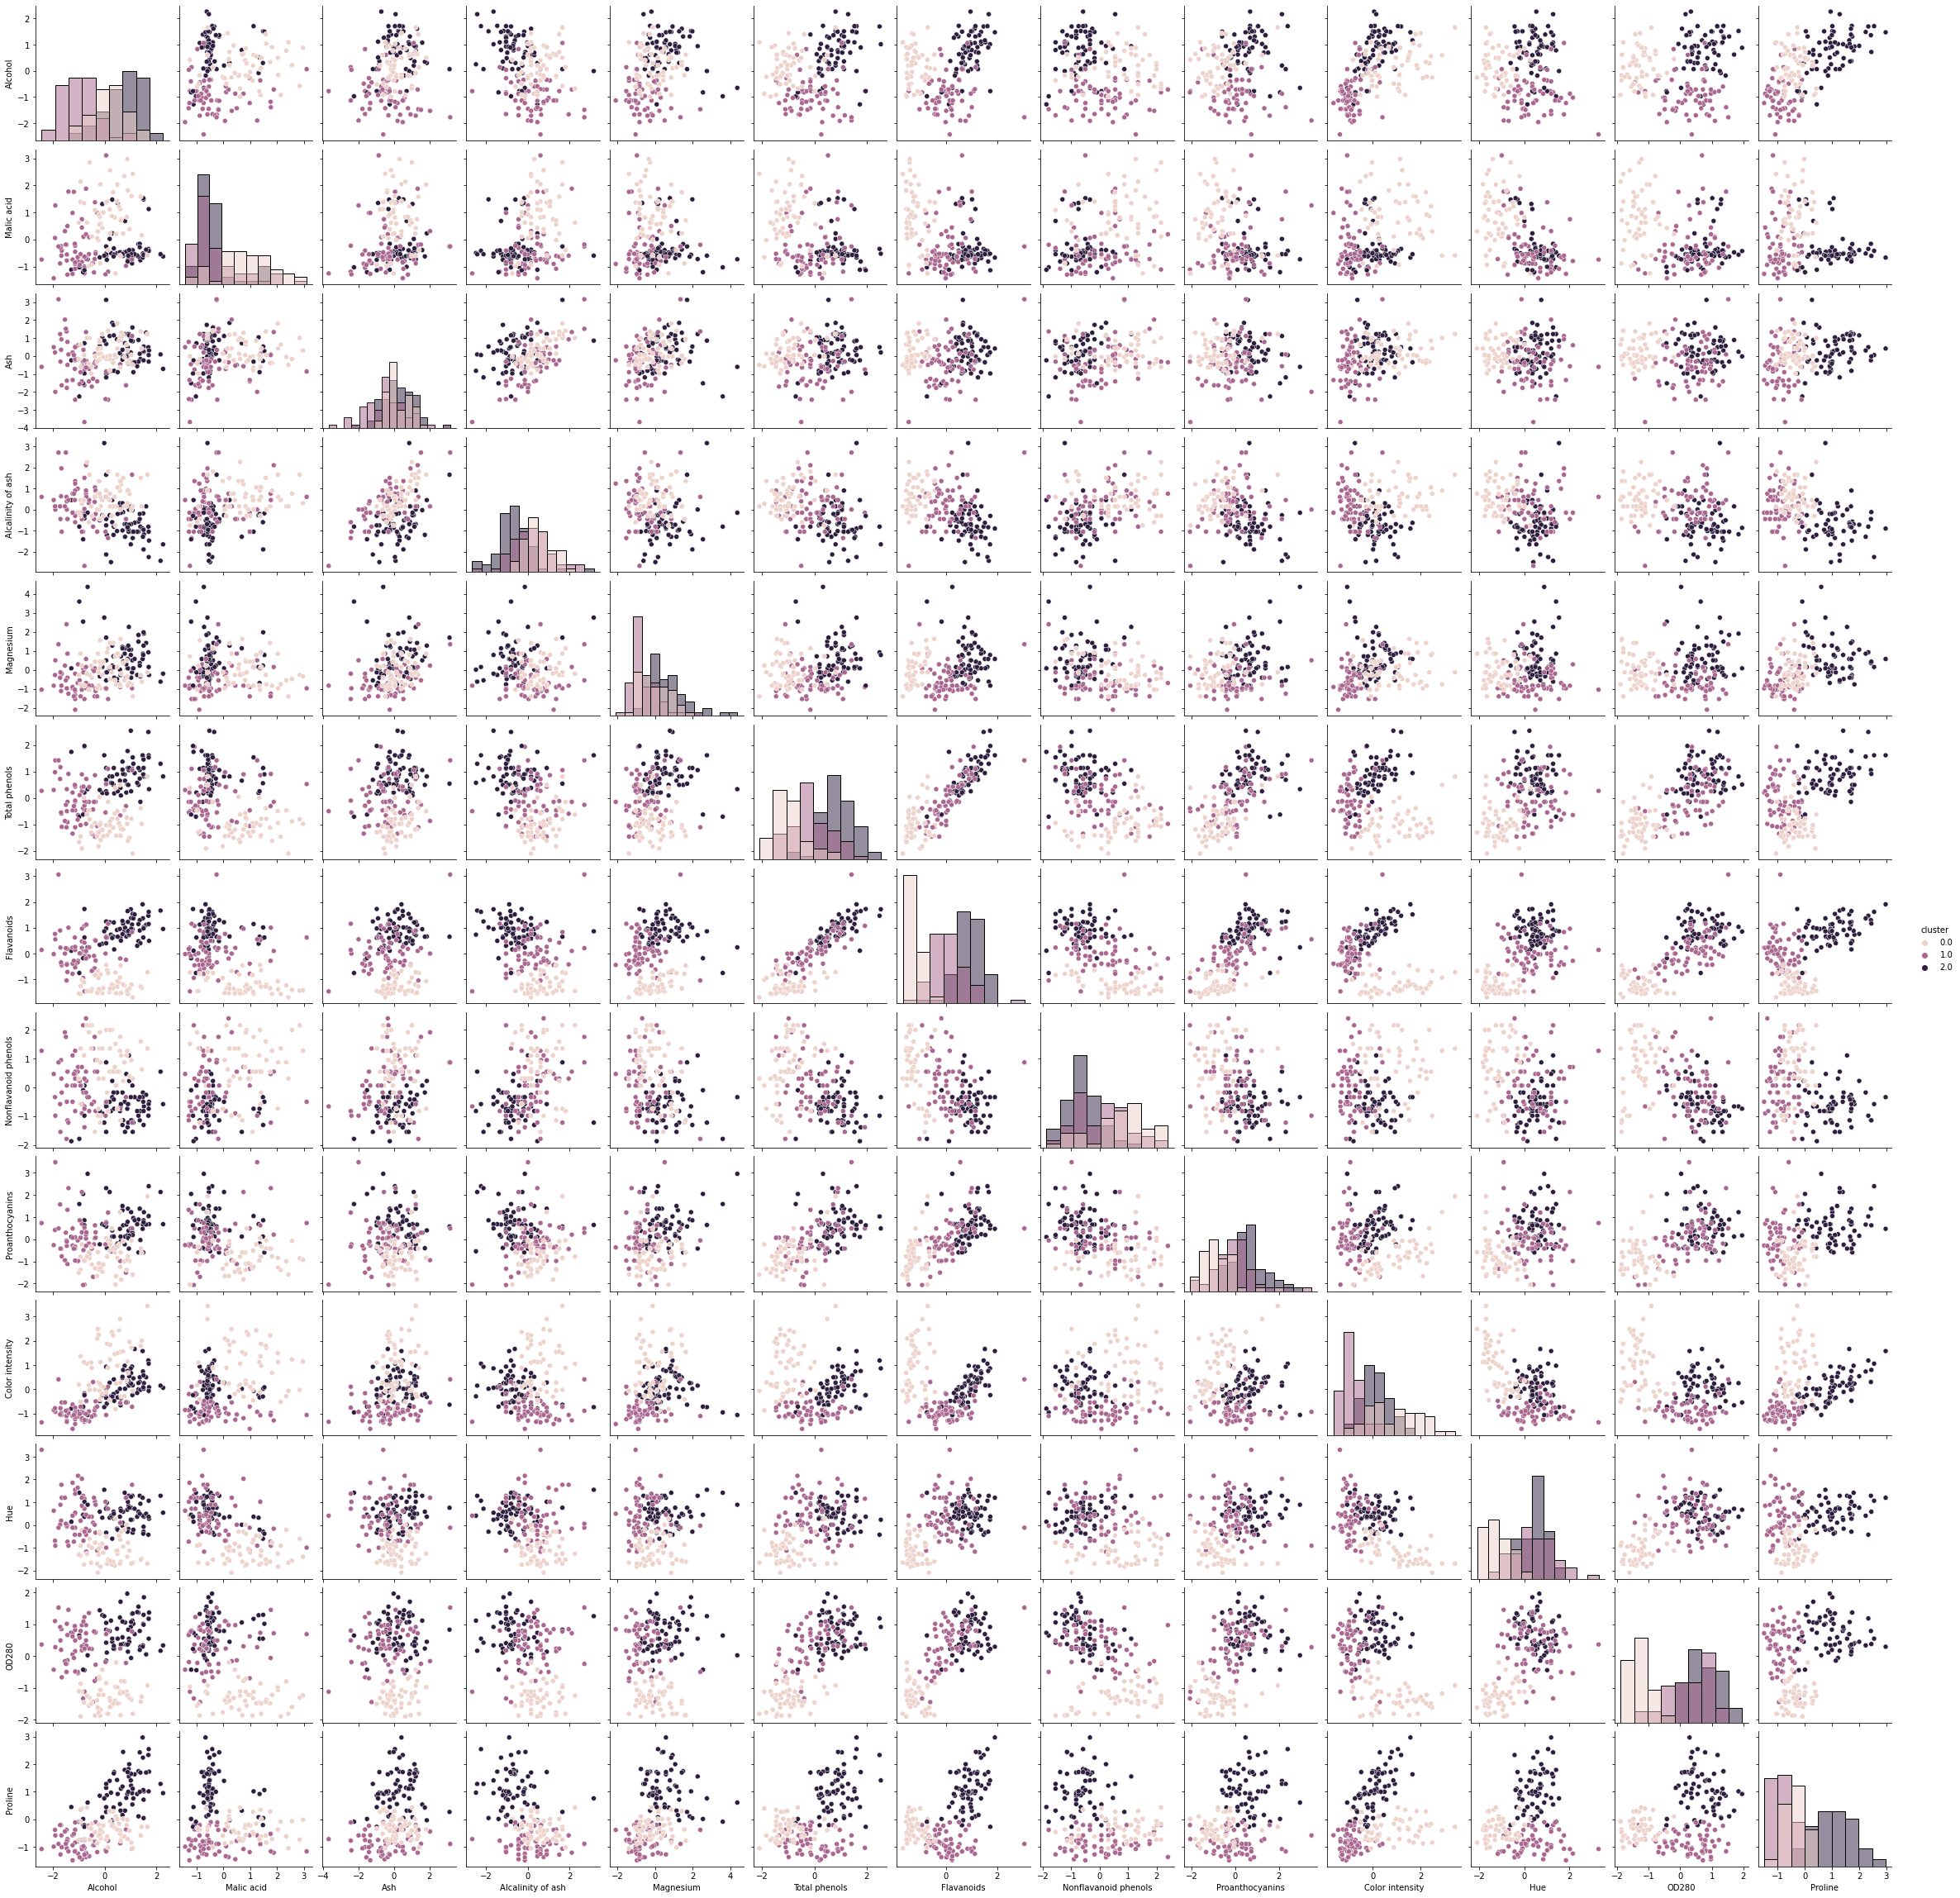

In [12]:
# kMeansclustering normalized data pairwise plot
kMeansClustering2 = KMeans(n_clusters = 3, random_state=0)
res = kMeansClustering2.fit_predict(normalizedData)
label_pred_KM = kMeansClustering2.labels_
normalizedData["cluster"] = label_pred_KM.astype('float64')
sns_plot = sns.pairplot(normalizedData, hue = "cluster",diag_kind="hist")